In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_all_feats.csv')
df = df.drop('Unnamed: 0', axis=1)
test_df = pd.read_csv('test_all_feats.csv')
test_df = test_df.drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,id,Body ID,cosine_bow,cosine_tf_idf,cosine_embd_mean,cosine_word2vec_mean,article_compound,article_neg,article_pos,article_neu,headline_compound,headline_neg,headline_pos,headline_neu,Stance,kl_dirichlet,kl_jelinek_mercer,cosine_svd,cosine_lda
0,0,712,0.000000,0.000000,0.894872,0.454471,0.226711,0.004444,0.064222,0.931444,-0.4767,0.194,0.0,0.806,unrelated,2.442403,2.908662,0.022576,0.073223
1,1,158,0.293544,0.381595,0.819022,0.770806,-0.208806,0.080000,0.034882,0.885000,0.0000,0.000,0.0,1.000,agree,3.684616,2.527968,0.077535,0.223328
2,2,137,0.132071,0.000000,0.898697,0.583302,-0.097930,0.097400,0.055400,0.847200,0.0000,0.000,0.0,1.000,unrelated,3.328136,2.203716,0.016907,0.077966
3,3,1034,0.000000,0.000000,0.866764,0.498030,-0.372425,0.098000,0.000000,0.902000,0.0000,0.000,0.0,1.000,unrelated,2.713277,2.266052,0.018836,0.176779
4,4,1923,0.088837,0.109371,0.738246,0.546560,0.113783,0.030114,0.068886,0.901000,0.0000,0.000,0.0,1.000,disagree,4.217803,3.316703,0.564787,0.710444


In [4]:
df.describe()

,id,Body ID,cosine_bow,cosine_tf_idf,cosine_embd_mean,cosine_word2vec_mean,article_compound,article_neg,article_pos,article_neu,headline_compound,headline_neg,headline_pos,headline_neu,kl_dirichlet,kl_jelinek_mercer,cosine_svd,cosine_lda
count,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000,44974.000000
mean,22486.524725,1365.647952,0.096040,0.065538,0.847549,0.533491,-0.057466,0.074114,0.057551,0.867301,-0.179387,0.142335,0.039353,0.817376,3.086500,2.318456,0.260015,0.347114
std,12983.062560,730.911219,0.116683,0.111492,0.103175,0.128721,0.185770,0.053044,0.039164,0.061113,0.345613,0.169778,0.087749,0.181475,0.816519,0.581761,0.324984,0.251946
min,0.000000,0.000000,0.000000,0.000000,-0.126620,0.031220,-0.904200,0.000000,0.000000,0.377000,-0.950100,0.000000,0.000000,0.185000,-0.000000,-0.000000,-0.384248,0.045698
25%,11243.250000,737.000000,0.000000,0.000000,0.815705,0.441222,-0.184540,0.038000,0.031303,0.832379,-0.458800,0.000000,0.000000,0.694000,2.550780,1.949483,0.022442,0.118374
50%,22486.500000,1419.000000,0.040366,0.005638,0.876075,0.524780,-0.042313,0.067846,0.050773,0.871714,0.000000,0.000000,0.000000,0.821000,3.158634,2.366715,0.094297,0.269669
75%,33729.750000,2002.000000,0.165211,0.090896,0.913084,0.625507,0.069660,0.101679,0.075750,0.907500,0.000000,0.263000,0.000000,1.000000,3.652775,2.712574,0.476558,0.551610
max,45012.000000,2532.000000,1.000000,1.000000,1.000000,1.000000,0.750600,0.623000,0.274000,1.000000,0.836000,0.815000,0.500000,1.000000,6.034687,4.717418,0.999923,1.000000


In [5]:
def add_polarity_product(df):
    df['prod_compound'] = df['article_compound'] * df['headline_compound']
    df['prod_neu'] = df['article_neu'] * df['headline_neu']
    df['prod_neg'] = df['article_neg'] * df['headline_neg']
    df['prod_pos'] = df['article_pos'] * df['headline_pos']
    return df

In [6]:
df['Stance_categ'] = df['Stance'].astype('category', categories=['agree', 'discuss', 'disagree', 'unrelated']).cat.codes
test_df['Stance_categ'] = test_df['Stance'].astype('category', categories=['agree', 'discuss', 'disagree', 'unrelated']).cat.codes
df = add_polarity_product(df)
test_df = add_polarity_product(test_df)

In [7]:
X_df = df.drop(['id', 'Body ID', 'Stance', 'Stance_categ'], axis=1)
X = X_df.as_matrix()
test_X_df = test_df.drop(['id', 'Body ID', 'Stance', 'Stance_categ'], axis=1)
test_X = test_X_df.as_matrix()

In [8]:
y = df['Stance_categ'].as_matrix()
test_y = test_df['Stance_categ'].as_matrix()

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

scorer = SelectKBest(mutual_info_classif, k=2)
scorer.fit(X, y)

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7fe020125ae8>)

In [10]:
sorted_col_idxs = np.argsort(scorer.scores_)

In [11]:
sorted_cols = [(X_df.columns.values[idx], scorer.scores_[idx]) for idx in sorted_col_idxs]

In [12]:
sorted_cols

[('prod_pos', 0.0038798815072327297),
 ('prod_neg', 0.017922312970127585),
 ('headline_pos', 0.018195094460656813),
 ('cosine_embd_mean', 0.019214615891815168),
 ('headline_compound', 0.028337364889149175),
 ('headline_neg', 0.031840742025953217),
 ('kl_dirichlet', 0.031901823511998773),
 ('headline_neu', 0.039583479488566553),
 ('kl_jelinek_mercer', 0.058398188789366756),
 ('prod_compound', 0.076158584944603369),
 ('prod_neu', 0.12965896133199895),
 ('cosine_lda', 0.23596194699607098),
 ('cosine_bow', 0.25484789147282583),
 ('article_pos', 0.26885027379954751),
 ('article_neg', 0.28455223368030236),
 ('cosine_word2vec_mean', 0.2893835847851951),
 ('article_neu', 0.2961065456040104),
 ('article_compound', 0.30583930826334682),
 ('cosine_svd', 0.46031206686213899),
 ('cosine_tf_idf', 0.49445759592990002)]

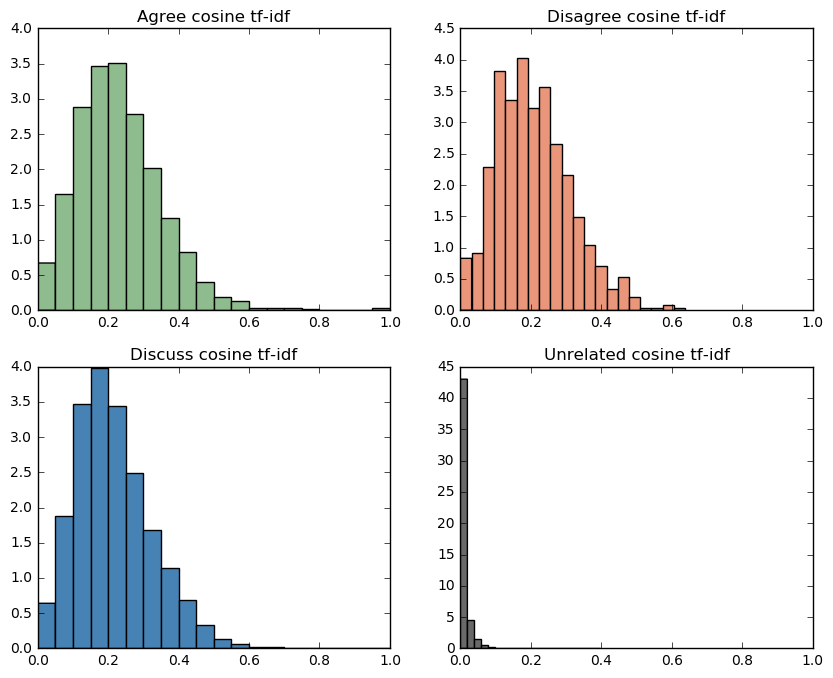

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

agree = df[df['Stance']=='agree']['cosine_tf_idf']
disagree = df[df['Stance']=='disagree']['cosine_tf_idf']
discuss = df[df['Stance']=='discuss']['cosine_tf_idf']
unrelated = df[df['Stance']=='unrelated']['cosine_tf_idf']

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].hist(agree, bins=20, label='Agree', color='darkseagreen', normed=True)
ax[0, 0].set_title('Agree cosine tf-idf')
ax[0, 0].set_xlim(0.0, 1.0)

ax[0, 1].hist(disagree, bins=20, label='Disagree', color='darksalmon', normed=True)
ax[0, 1].set_title('Disagree cosine tf-idf')
ax[0, 1].set_xlim(0.0, 1.0)

ax[1, 0].hist(discuss, bins=20, label='Discuss', color='steelblue', normed=True)
ax[1, 0].set_title('Discuss cosine tf-idf')
ax[1, 0].set_xlim(0.0, 1.0)

ax[1, 1].hist(unrelated, bins=20, label='Unrelated', color='dimgrey', normed=True)
ax[1, 1].set_title('Unrelated cosine tf-idf')
ax[1, 1].set_xlim(0.0, 1.0)
plt.show()

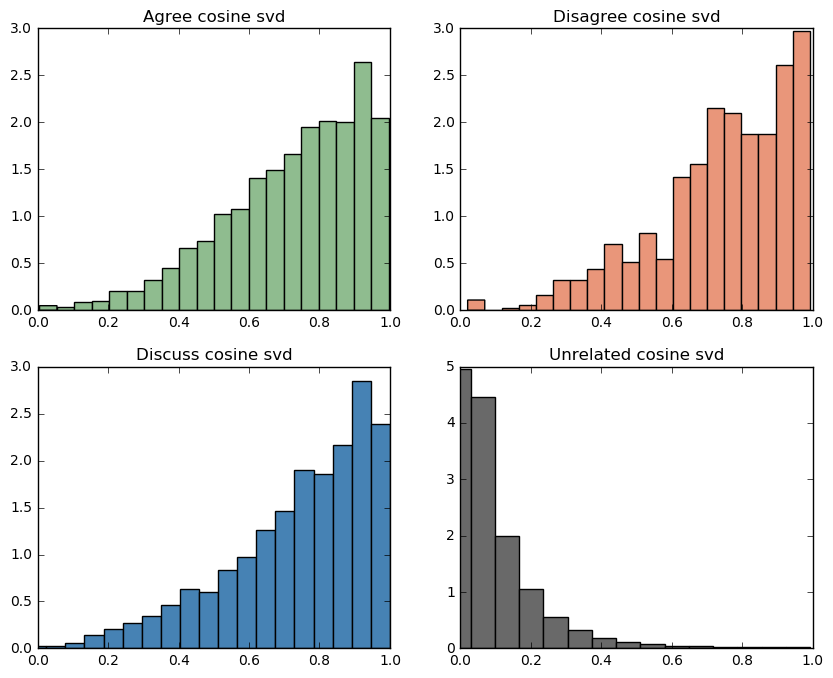

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

agree = df[df['Stance']=='agree']['cosine_svd']
disagree = df[df['Stance']=='disagree']['cosine_svd']
discuss = df[df['Stance']=='discuss']['cosine_svd']
unrelated = df[df['Stance']=='unrelated']['cosine_svd']

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].hist(agree, bins=20, label='Agree', color='darkseagreen', normed=True)
ax[0, 0].set_title('Agree cosine svd')
ax[0, 0].set_xlim(0.0, 1.0)

ax[0, 1].hist(disagree, bins=20, label='Disagree', color='darksalmon', normed=True)
ax[0, 1].set_title('Disagree cosine svd')
ax[0, 1].set_xlim(0.0, 1.0)

ax[1, 0].hist(discuss, bins=20, label='Discuss', color='steelblue', normed=True)
ax[1, 0].set_title('Discuss cosine svd')
ax[1, 0].set_xlim(0.0, 1.0)

ax[1, 1].hist(unrelated, bins=20, label='Unrelated', color='dimgrey', normed=True)
ax[1, 1].set_title('Unrelated cosine svd')
ax[1, 1].set_xlim(0.0, 1.0)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
pred = model.predict(X)
test_pred = model.predict(test_X)
accuracy = np.mean(np.equal(y, pred))
test_accuracy = np.mean(np.equal(test_y, test_pred))

In [18]:
accuracy

0.89271579134611112

In [19]:
test_accuracy

0.89195678271308521

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
cnf = confusion_matrix(test_y, test_pred)

Confusion matrix, without normalization


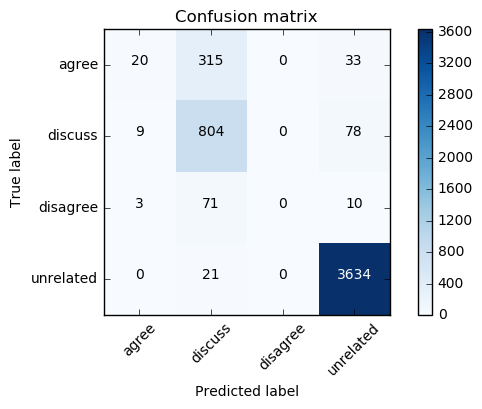

In [23]:
plt.figure()
plot_confusion_matrix(cnf, ['agree', 'discuss', 'disagree', 'unrelated'])
plt.show()

In [24]:
np.mean(model.coef_, axis=0)

array([-0.48346448, -2.93133384, -0.1823331 ,  0.76643575,  0.25435304,
       -0.65450996, -0.14509049, -0.59719118,  0.09077158, -0.49713247,
       -0.40245285, -0.39200787, -0.01037256, -0.03801035,  0.53908733,
        0.50831535,  0.15712193, -0.08508354, -0.20535509, -0.07449855])

In [25]:
from logistic_regression_newton_raphson import LogisticRegression

In [26]:
model = LogisticRegression(tol=1e-1)

In [27]:
model.fit(X, y.reshape((-1, 1)), logging=True)

Fitting for class 0
Loss: [[ 31173.6012985]]
Accuracy: 0.9267132120780895
Loss: [[ 11398.22868523]]
Accuracy: 0.9262462756259172
Loss: [[ 8779.30059506]]
Accuracy: 0.9256681638279896
Loss: [[ 8049.21574819]]
Accuracy: 0.9246453506470406
Loss: [[ 7896.94351542]]
Final Accuracy: 0.9241561791257171
Fitting for class 1
Loss: [[ 31173.6012985]]
Accuracy: 0.8883799528616534
Loss: [[ 13163.71272527]]
Accuracy: 0.8874905500956108
Loss: [[ 10651.27733336]]
Accuracy: 0.8863343264997554
Loss: [[ 10029.43546944]]
Final Accuracy: 0.8861342108773959
Fitting for class 2
Loss: [[ 31173.6012985]]
Accuracy: 0.9831902877217948
Loss: [[ 7442.22737341]]
Accuracy: 0.9831902877217948
Loss: [[ 4278.40607649]]
Accuracy: 0.9831902877217948
Loss: [[ 3370.44633007]]
Accuracy: 0.9831902877217948
Loss: [[ 3089.302506]]
Accuracy: 0.9831902877217948
Loss: [[ 3020.80601959]]
Final Accuracy: 0.9831902877217948
Fitting for class 3
Loss: [[ 31173.6012985]]
Accuracy: 0.9798994974874372
Loss: [[ 8515.77062813]]
Accuracy: 0

In [28]:
pred = model.predict(X)

In [29]:
test_accuracy = np.mean(np.equal(y.reshape((-1, 1)), pred))

In [30]:
test_accuracy

0.89471694756970699

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
pred = model.predict(X)

In [34]:
test_accuracy = np.mean(np.equal(y, np.round(pred)))

In [35]:
test_accuracy

0.81762796282296435

In [36]:
from linear_regression import LinearRegression

In [37]:
model = LinearRegression(learning_rate=0.1, tol=1e-6)
model.fit_closed_form(X, y.reshape((-1, 1)))

Loss closed form: 0.10947123930943108


In [38]:
pred = model.predict(X)

In [39]:
test_accuracy = np.mean(np.equal(y.reshape((-1, 1)), np.round(pred)))

In [40]:
test_accuracy

0.81745008226975591

In [41]:
model.fit(X, y.reshape((-1, 1)), logging=True)

Initial loss: 1.2144249485987746
Loss: 1.175591256321625
Loss: 1.1382948508276534
Loss: 1.102471877933119
Loss: 1.068061218013316
Loss: 1.0350043663774866
Loss: 1.0032453189548427
Loss: 0.9727304630534876
Loss: 0.9434084729647829
Loss: 0.9152302101959783
Loss: 0.8881486281237272
Loss: 0.8621186808704715
Loss: 0.8370972362146069
Loss: 0.8130429923538797
Loss: 0.7899163983496016
Loss: 0.7676795780870465
Loss: 0.7462962575948104
Loss: 0.7257316955730089
Loss: 0.7059526169869436
Loss: 0.6869271495893277
Loss: 0.6686247632403292
Loss: 0.6510162119005729
Loss: 0.6340734781778645
Loss: 0.6177697203137648
Loss: 0.6020792215012604
Loss: 0.5869773414296736
Loss: 0.5724404699576232
Loss: 0.5584459828192956
Loss: 0.5449721992735607
Loss: 0.5319983416095104
Loss: 0.5195044964258958
Loss: 0.50747157760563
Loss: 0.4958812909100716
Loss: 0.48471610012117294
Loss: 0.47395919466280995
Loss: 0.46359445863568205
Loss: 0.4536064412031211
Loss: 0.44398032826794204
Loss: 0.43470191538316505
Loss: 0.425757581

In [42]:
pred = model.predict(X)
test_accuracy = np.mean(np.equal(y.reshape((-1, 1)), np.round(pred)))

In [43]:
test_accuracy

0.81360341530662161